In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import joblib
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('../features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df = df.drop(labels='filename', axis=1)

In [6]:
audio_recording = "./country/country.00050.wav"
data , sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04446705,  0.06373049,  0.05768819, ..., -0.13878523,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

In [8]:
import IPython
IPython.display.Audio(data, rate=sr)

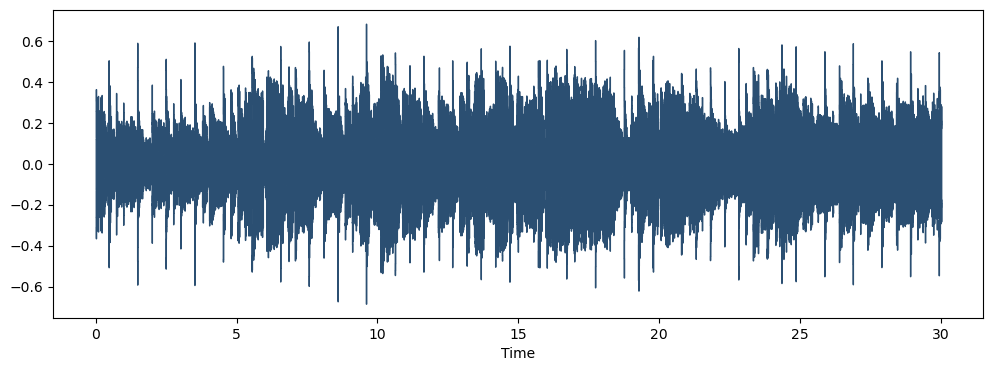

In [9]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="#2B4F72")
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_28740\2260726204.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


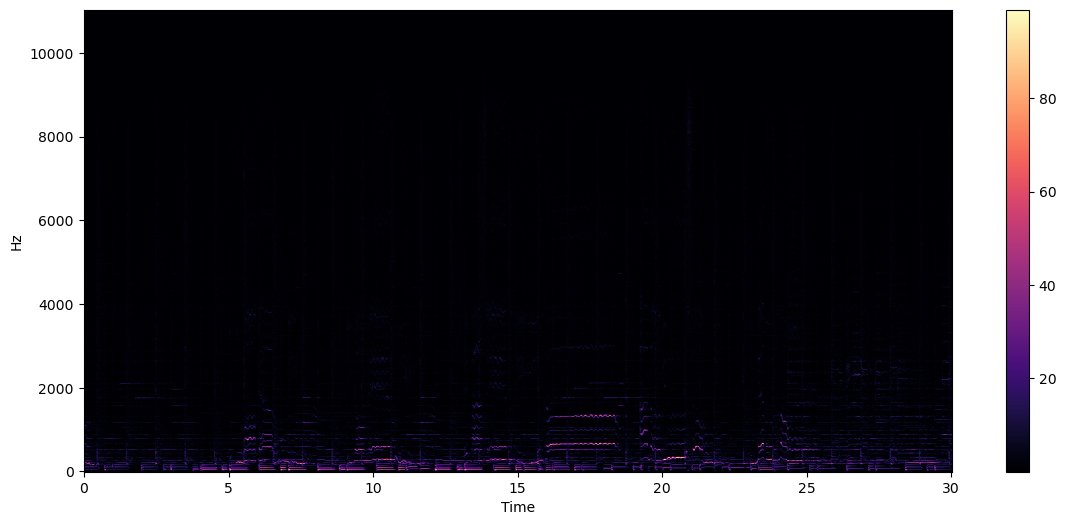

In [107]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

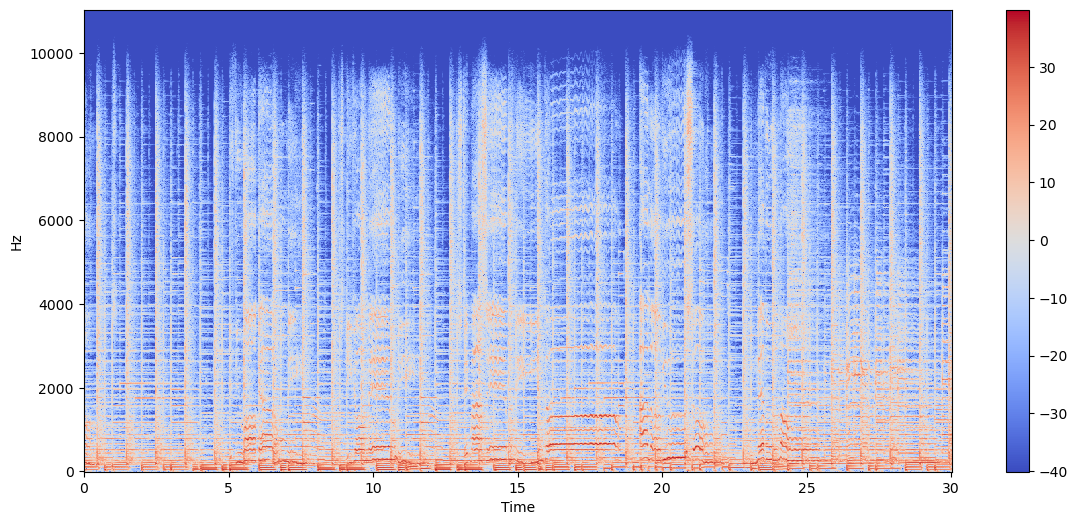

In [109]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

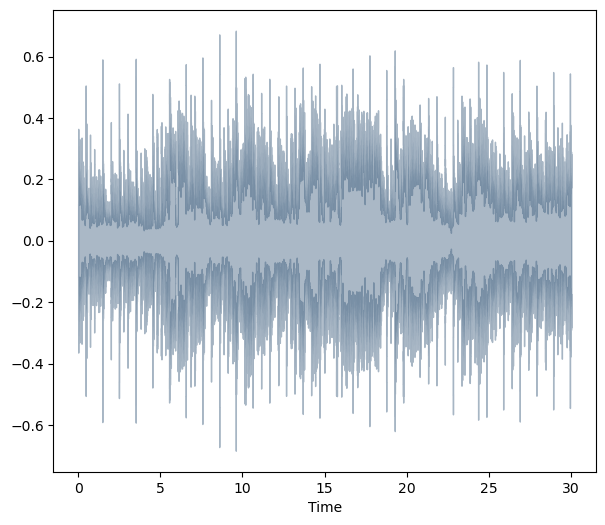

In [111]:
spectral_rolloff =librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

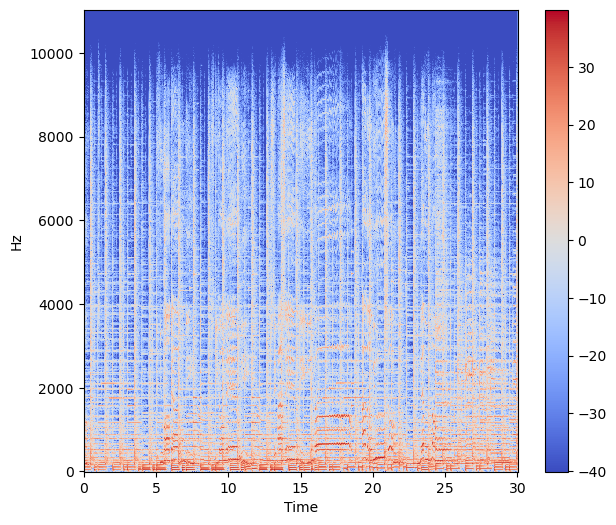

In [113]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

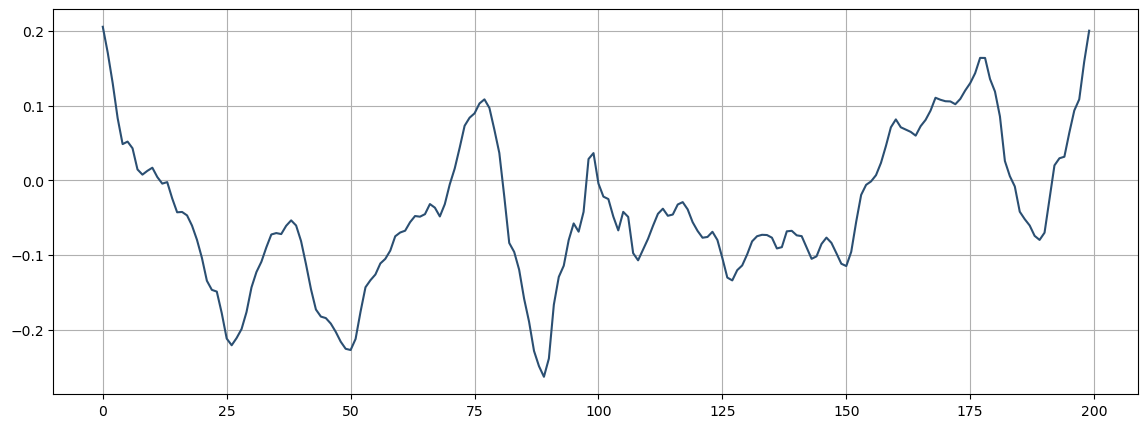

In [115]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [117]:
zero_cross_rate =librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero-crossings is:",sum(zero_cross_rate))

The number of zero-crossings is: 8


In [119]:
class_list=df.iloc[:,-1]
convertor = LabelEncoder()

In [123]:
y=convertor.fit_transform(class_list)
np.save("classes.npy",convertor.classes_)#save class.npy

In [125]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [127]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [129]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [131]:
from joblib import dump
dump(fit, 'scaler.joblib')

['scaler.joblib']

In [133]:
X.shape

(9990, 58)

In [135]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [137]:
len(y_train)

6693

In [139]:
len(y_test)

3297

In [141]:
from keras.models import Sequential

In [155]:
def trainModel(model,epochs,optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [157]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot(figsize=(12,6))
    plt.show()

In [159]:
import keras as k

In [161]:
model = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax'),
])

# Print the model summary
print(model.summary())

# Define your trainModel function
# def trainModel(model, epochs, optimizer):
#     batch_size = 128
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Train the model
model_history = trainModel(model=model,epochs=600,optimizer='adam')


C:\Users\Harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3050 - loss: 1.9324 - val_accuracy: 0.5805 - val_loss: 1.1773
Epoch 2/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5653 - loss: 1.2404 - val_accuracy: 0.6985 - val_loss: 0.9116
Epoch 3/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.9594 - val_accuracy: 0.7495 - val_loss: 0.7575
Epoch 4/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7148 - loss: 0.8485 - val_accuracy: 0.7655 - val_loss: 0.7051
Epoch 5/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7523 - loss: 0.7431 - val_accuracy: 0.7898 - val_loss: 0.6269
Epoch 6/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7899 - loss: 0.6316 - val_accuracy: 0.8077 - val_loss: 0.5862
Epoch 7/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 0.5568 - val_accuracy: 0.8159 - val_loss: 0.5465
Epoch 8/600
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8252 - loss: 0.5140 - val_accuracy: 0.826

In [163]:
test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=128)
print("The test Loss is:",test_loss)
print("\nThe Best test Accuracy is:",test_acc*100)
model.save("my_model.h5")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9248 - loss: 0.5277 


The test Loss is: 0.5525621771812439

The Best test Accuracy is: 92.41734743118286


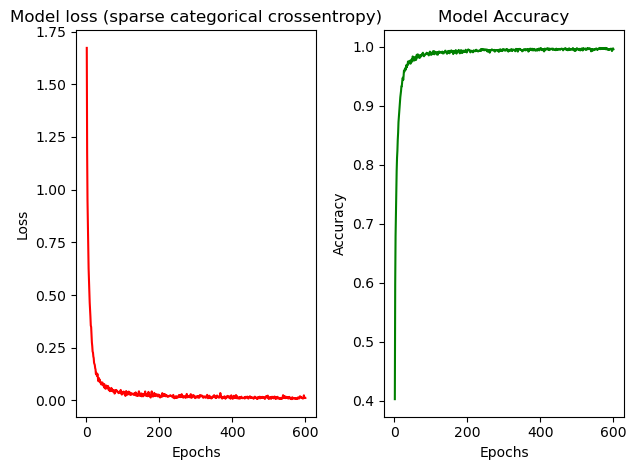

In [165]:
#training plots
epochs = np.arange(1,601)
plt.subplot(1,2,1)
plt.plot(epochs,model_history.history['loss'],color='r')
plt.title('Model loss (sparse categorical crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(epochs,model_history.history['accuracy'],color='g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [167]:
#confusion matrix
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
preds = []
for i in pred:
    out = np.argmax(i)
    preds.append(out)
cm = confusion_matrix(y_test,preds)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


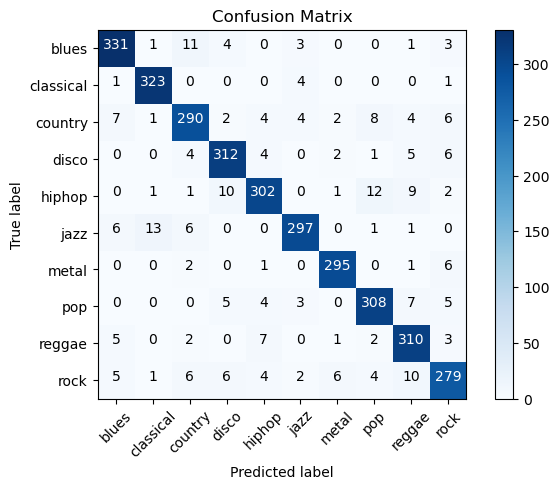

In [171]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = convertor.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [175]:
# Validation
# try:
#     print(model.input_shape)
# except AttributeError:
#     print("The model does not have an input_shape attribute. Ensure the model is correctly built.")
#print(model.layers[0].input_shape)
def predict(model, X, Y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    print(prediction)
    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index:", Y)
    print("Predicted index:", predicted_index)

# Testing
X = X_test[150]  # Just a random sample
Y = y_test[150]
predict(model,X,Y)  # Predicting its class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.0078590e-14 3.2334866e-23 6.3714837e-17 1.0000000e+00 4.9383804e-13
  9.7567163e-19 8.4396513e-14 2.1032597e-15 7.8014180e-16 6.2738971e-14]]
Expected index: 3
Predicted index: [3]


In [211]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
import numpy as np
import librosa
from joblib import load

# Load the trained model
model = load_model('my_model.h5')
le = LabelEncoder()
le.classes_ = np.load('classes.npy', allow_pickle=True)
fit=load('scaler.joblib')

# Function to extract features from an audio file
def extract_features(filename):
    y, sr = librosa.load(filename, duration=30)
    length=66149
    chroma_stft_mean = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    chroma_stft_var=librosa.feature.chroma_stft(y=y, sr=sr).var()
    rms_mean=librosa.feature.rms(y=y).mean()
    rms_var=librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var =librosa.feature.spectral_centroid(y=y, sr=sr).var()
    spectral_bandwidth_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwidth_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var =librosa.feature.spectral_rolloff(y=y, sr=sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y).mean()
    zero_crossing_rate_var =librosa.feature.zero_crossing_rate(y=y).var()
    y_harmonic = librosa.effects.harmonic(y)
    harmony_mean = np.mean(y_harmonic)
    harmony_var = np.var(y_harmonic)
    y_percussive = librosa.effects.percussive (y)
    perceptr_mean = np.mean(y_percussive)
    perceptr_var = np.var(y_percussive)
    tempo, _  = librosa.beat.beat_track (y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc1_mean = mfccs[0].mean()
    mfcc1_var = mfccs[0].var()
    mfcc2_mean =  mfccs[1].mean()
    mfcc2_var = mfccs [1]. var()
    mfcc3_mean = mfccs [2].mean()
    mfcc3_var = mfccs [2].var()
    mfcc4_mean = mfccs [3].mean()
    mfcc4_var = mfccs [3]. var()
    mfcc5_mean = mfccs [4].mean()
    mfcc5_var = mfccs [4]. var()
    mfcc6_mean = mfccs [5].mean()
    mfcc6_var = mfccs [5]. var()
    mfcc7_mean = mfccs [6].mean()
    mfcc7_var = mfccs [6]. var()
    mfcc8_mean = mfccs [7].mean()
    mfcc8_var = mfccs [7]. var()
    mfcc9_mean = mfccs [8].mean()
    mfcc9_var = mfccs [8]. var()
    mfcc10_mean = mfccs [9].mean()
    mfcc10_var = mfccs [9]. var()
    mfcc11_mean = mfccs [10].mean()
    mfcc11_var = mfccs [10].var()
    mfcc12_mean =  mfccs [11].mean()
    mfcc12_var = mfccs [11].var()
    mfcc13_mean = mfccs [12].mean()
    mfcc13_var = mfccs [12]. var()
    mfcc14_mean = mfccs [13].mean()
    mfcc14_var = mfccs [13]. var()
    mfcc15_mean = mfccs [14].mean()
    mfcc15_var = mfccs [14]. var()
    mfcc16_mean = mfccs [15].mean()
    mfcc16_var = mfccs [15].var()
    mfcc17_mean =  mfccs [16].mean()
    mfcc17_var = mfccs [16].var()
    mfcc18_mean = mfccs [17].mean()
    mfcc18_var = mfccs [17]. var()
    mfcc19_mean = mfccs [18].mean()
    mfcc19_var = mfccs [18].var()
    mfcc20_mean =  mfccs [19].mean()
    mfcc20_var = mfccs [19].var()

    features = np.array([length,chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean,
                        spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean,
                        rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var,
                        tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var,
                        mfcc4_mean,mfcc4_var,mfcc5_mean, mfcc5_var, mfcc6_mean,mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var,
                        mfcc9_mean,mfcc9_var, mfcc10_mean,mfcc10_var, mfcc11_mean, mfcc11_var, mfcc12_mean, mfcc12_var,mfcc13_mean, mfcc13_var
                        ,mfcc14_mean, mfcc14_var, mfcc15_mean,mfcc15_var, mfcc16_mean, mfcc16_var, mfcc17_mean,mfcc17_var, mfcc18_mean, mfcc18_var,
                        mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
        
    ])
    return features
#create a function to classify an audio file
def classify_audio():
    filename = filedialog.askopenfilename()
    if filename:
        X = extract_features(filename)
        X = np.expand_dims(X, axis=0)# to fix input shape so it can be taken as input by model
        X=fit.transform(X) #transforemed to the scale that we fitted above
        #print (X) #for debuggin remove later
        y_pred = model.predict(X)
        #print(y_pred)
        predicted_index=le.classes_[np.argmax(y_pred,axis=1)]
        #print(predicted_index)
        global predicted_genre
        # create a function to classify an audio file
        predicted_genre=predicted_index[0]

        result_label = tk.Label(window, text='The genre for you music is', font=("Helvetica",20))
        result_label.pack()
        # create a label for displaying the classification result
        result_label = tk.Label(window, text-predicted_genre, font=("Helvetica", 20))
        result_label.pack(pady=20)


# create a tkinter window
window = tk.Tk()
window.geometry("900x600")
window.title('Audio Genre Classification')

# create a file loading button
load_button=tk.Button(window, text='Load Audio File', command=classify_audio) #from here it goes to classify audio function
load_button.pack(pady=20)
# start the GUI
window.mainloop() 

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Harsh\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Harsh\AppData\Local\Temp\ipykernel_28740\2788891626.py", line 89, in classify_audio
    X = extract_features(filename)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Harsh\AppData\Local\Temp\ipykernel_28740\2788891626.py", line 79, in extract_features
    features = np.array([length,chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean,spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean,rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var,tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var,
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^